In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-dark-palette')
mpl.style.use('seaborn-whitegrid')

In [9]:
kwargs = dict(sep=" ", header=None)
DF_python = pd.read_csv('python_output', **kwargs)
DF_cpp = pd.read_csv('cpp_output', **kwargs)

Times withon callback

In [67]:
def time_stats(times, title):
    print('{}: mean = {:.4f}, median = {:.4f}, std = {:.4f}'
          .format(title, times.mean(), times.median(), times.std()))

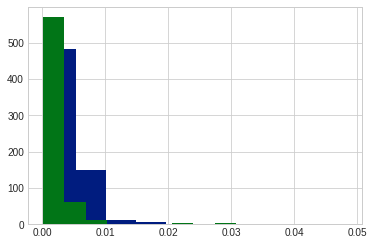

Cpp: mean = 0.0020, median = 0.0010, std = 0.0036
Python: mean = 0.0048, median = 0.0044, std = 0.0033


In [68]:
times_within_callback_colnumber = 9

time_python = DF_python.loc[:, times_within_callback_colnumber]
time_cpp = DF_cpp.loc[:, times_within_callback_colnumber+1].apply(lambda x: float(x[:-4]))
time_python.hist()
time_cpp.hist()
plt.show()

time_stats(time_cpp, 'Cpp')
time_stats(time_python, 'Python')

In [66]:
out = pd.DataFrame()
out['dupa'] = DF_python.loc[:, 1].apply(lambda x: float(x[1:-2]))

Because `ROS_INFO` produces additional white spaces, we need to extract the right columns:

In [5]:
def _extract_yaw_and_throttle_colnumbers(DF_data):
    one_row = DF_data.iloc[0]
    yaw_colnumber = one_row.index[one_row == 'yaw:']
    assert len(yaw_colnumber) == 1
    yaw_colnumber = yaw_colnumber[0]
    throttle_colnumber = one_row.index[one_row == 'throttle:']
    assert len(throttle_colnumber) == 1
    throttle_colnumber = throttle_colnumber[0]
    # "+1" because we want the columns following 'yaw:' and 'throttle:'
    return DF_data.loc[:, [yaw_colnumber+1, throttle_colnumber+1]]


def _extract_timestamp(DF_data):
    one_row = DF_data.iloc[0]
    # I was getting NaN values -- hence the dropna
    # Also, I needed to cast everything to bool, because the NaNs imposed "object" type columns
    match_timestamp_regex = one_row.str.contains('^\[\w+.\w+\]:$').dropna().astype(bool)
    timestamp_colnumber = match_timestamp_regex.index[match_timestamp_regex]
    assert len(timestamp_colnumber) == 1
    timestamp_colnumber = timestamp_colnumber[0]
    return DF_data.loc[:, timestamp_colnumber].apply(lambda x: float(x[1:-2]))


def prepare_data(DF_data, suffix):
    DF_out = pd.DataFrame()
    DF_out[['yaw_'+suffix, 'throttle_'+suffix]] = _extract_yaw_and_throttle_colnumbers(DF_data)
    DF_out['timestamp'] = _extract_timestamp(DF_data)
    return DF_out

In [6]:
DF_python = prepare_data(DF_python, suffix='python')
DF_cpp = prepare_data(DF_cpp, suffix='cpp')

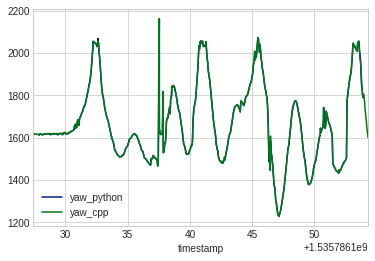

In [7]:
slc = slice(0, 1000)

ax = DF_python.iloc[slc].plot(x='timestamp', y='yaw_python')
ax = DF_cpp.iloc[slc].plot(x='timestamp', y='yaw_cpp', ax=ax)
plt.show()